In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
df = pd.read_csv('NiftyHistoricalIndex.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df = df['2021-01-01':]
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
2021-01-01,2021-01-01,13996.10,14049.85,13991.35,14018.50,258090905,15873.75
2021-01-04,2021-01-04,14104.35,14147.95,13953.75,14132.90,494999295,28705.09
2021-01-05,2021-01-05,14075.15,14215.60,14048.15,14199.50,492475349,30872.87
2021-01-06,2021-01-06,14240.95,14244.15,14039.90,14146.25,632323316,34615.55
2021-01-07,2021-01-07,14253.75,14256.25,14123.10,14137.35,559173512,33446.47
...,...,...,...,...,...,...,...
2022-05-24,2022-05-24,16225.55,16262.80,16078.60,16125.15,249778296,21895.75
2022-05-25,2022-05-25,16196.35,16223.35,16006.95,16025.80,243342347,21400.14
2022-05-26,2022-05-26,16105.00,16204.45,15903.70,16170.15,314305739,27721.21
2022-05-27,2022-05-27,16296.60,16370.60,16221.95,16352.45,274064956,21341.98


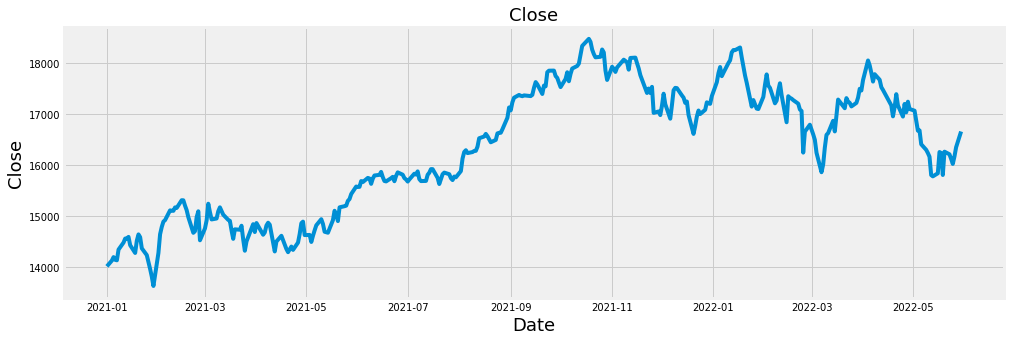

In [23]:
plt.figure(figsize=(15,5))
plt.title('Close', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close', fontsize = 18)
plt.show()

In [24]:
ShortEMA = df.Close.ewm(span=5, adjust = False).mean()

MiddleEMA = df.Close.ewm(span=21, adjust = False).mean()

LongEMA = df.Close.ewm(span=63, adjust = False).mean()


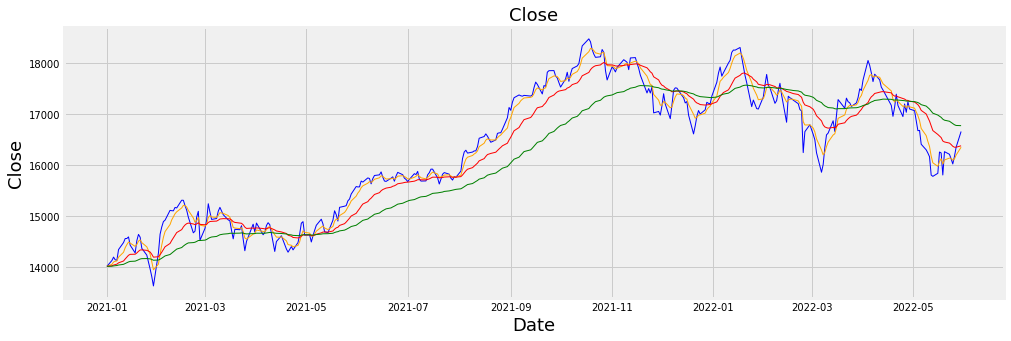

In [25]:
plt.figure(figsize=(15,5))
plt.title('Close', fontsize = 18)
plt.plot(df['Close'], label = 'Close', color = 'blue', linewidth = 1)
plt.plot(ShortEMA, label = 'Short EMA', color = 'orange', linewidth = 1)
plt.plot(MiddleEMA, label = 'Middle EMA', color = 'red', linewidth = 1)
plt.plot(LongEMA, label = 'Long EMA', color = 'green', linewidth = 1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close', fontsize = 18)
plt.show()

In [26]:
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Short,Middle,Long
2021-01-01,2021-01-01,13996.10,14049.85,13991.35,14018.50,258090905,15873.75,14018.500000,14018.500000,14018.500000
2021-01-04,2021-01-04,14104.35,14147.95,13953.75,14132.90,494999295,28705.09,14056.633333,14028.900000,14022.075000
2021-01-05,2021-01-05,14075.15,14215.60,14048.15,14199.50,492475349,30872.87,14104.255556,14044.409091,14027.619531
2021-01-06,2021-01-06,14240.95,14244.15,14039.90,14146.25,632323316,34615.55,14118.253704,14053.667355,14031.326733
2021-01-07,2021-01-07,14253.75,14256.25,14123.10,14137.35,559173512,33446.47,14124.619136,14061.274869,14034.639960
...,...,...,...,...,...,...,...,...,...,...
2022-05-24,2022-05-24,16225.55,16262.80,16078.60,16125.15,249778296,21895.75,16135.429871,16406.318840,16839.207093
2022-05-25,2022-05-25,16196.35,16223.35,16006.95,16025.80,243342347,21400.14,16098.886580,16371.726218,16813.788121
2022-05-26,2022-05-26,16105.00,16204.45,15903.70,16170.15,314305739,27721.21,16122.641054,16353.401107,16793.674430
2022-05-27,2022-05-27,16296.60,16370.60,16221.95,16352.45,274064956,21341.98,16199.244036,16353.314643,16779.886167


In [27]:
def buy_sell_function(data):
    
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0, len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)
        

In [28]:
# Add the buy and sell signals to the dataset
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

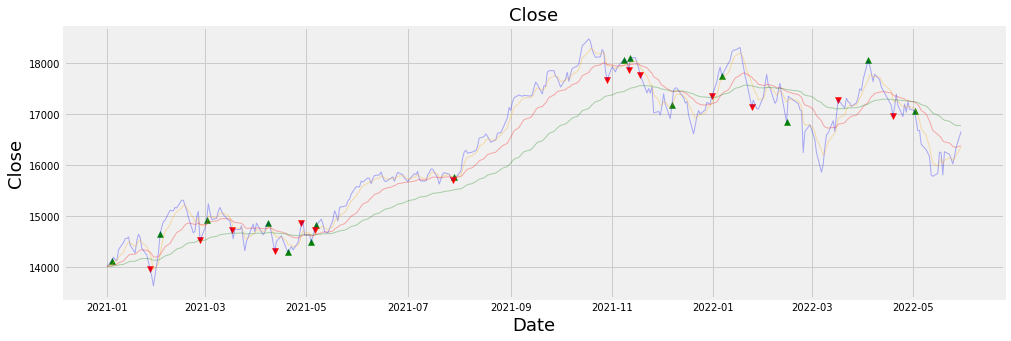

In [29]:
plt.figure(figsize=(15,5))
plt.title('Close', fontsize = 18)
plt.plot(df['Close'], label = 'Close', color = 'blue', linewidth = 1,  alpha = 0.3)
plt.plot(ShortEMA, label = 'Short EMA', color = 'orange', linewidth = 1,  alpha = 0.3)
plt.plot(MiddleEMA, label = 'Middle EMA', color = 'red', linewidth = 1,  alpha = 0.3)
plt.plot(LongEMA, label = 'Long EMA', color = 'green', linewidth = 1,  alpha = 0.3)
plt.scatter(df.index, df['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close', fontsize = 18)
plt.show()